In [4]:
#Neural Network Classification with Pytorch
from sklearn.datasets import make_circles
samples = 1000
x,y = make_circles(n_samples=samples, noise=0.03, random_state=42)#features and labels
len(x), len(y)

(1000, 1000)

In [5]:
x,y

(array([[ 0.75424625,  0.23148074],
        [-0.75615888,  0.15325888],
        [-0.81539193,  0.17328203],
        ...,
        [-0.13690036, -0.81001183],
        [ 0.67036156, -0.76750154],
        [ 0.28105665,  0.96382443]], shape=(1000, 2)),
 array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
        0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
        0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
        1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
        1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
        1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
        0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
        1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
        1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
        0, 1

In [25]:
import torch
from torch import nn
import pandas as pd
df=pd.DataFrame({"x1":x[:,0], "x2":x[:,1], "label":y})
df

,x1,x2,label
0,0.754246,0.231481,1.0
1,-0.756159,0.153259,1.0
2,-0.815392,0.173282,1.0
3,-0.393731,0.692883,1.0
4,0.442208,-0.896723,0.0
...,...,...,...
995,0.244054,0.944125,0.0
996,-0.978655,-0.272373,0.0
997,-0.136900,-0.810012,1.0
998,0.670362,-0.767502,0.0


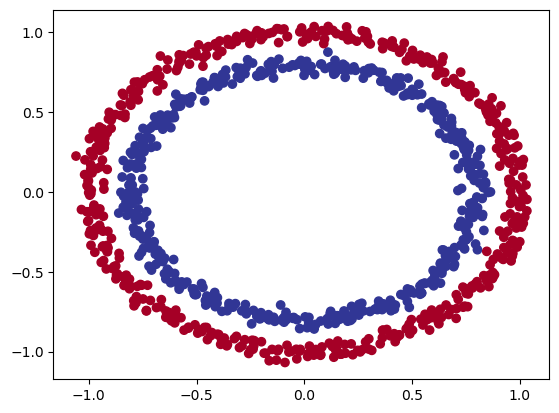

In [7]:
import matplotlib.pyplot as plt
plt.scatter(x=x[:,0], y=x[:,1], c=y, cmap=plt.cm.RdYlBu)

In [8]:
x.shape,y.shape

((1000, 2), (1000,))

In [9]:
type(x), type(y)

(numpy.ndarray, numpy.ndarray)

In [10]:
x= torch.from_numpy(x).type(torch.float)
y = torch.from_numpy(y).type(torch.float)
x,y#now u see the data has been changed to tensor

(tensor([[ 0.7542,  0.2315],
         [-0.7562,  0.1533],
         [-0.8154,  0.1733],
         ...,
         [-0.1369, -0.8100],
         [ 0.6704, -0.7675],
         [ 0.2811,  0.9638]]),
 tensor([1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 0., 1.,
         1., 0., 1., 0., 0., 1., 0., 0., 0., 1., 1., 1., 0., 0., 1., 0., 0., 0.,
         1., 1., 1., 0., 0., 0., 0., 1., 0., 0., 1., 1., 0., 1., 1., 1., 0., 1.,
         0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 1., 1., 1., 1., 0., 1., 0., 0.,
         1., 1., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 1., 1., 1., 1., 0.,
         0., 0., 1., 0., 1., 0., 1., 0., 0., 1., 1., 0., 1., 0., 1., 1., 1., 1.,
         0., 1., 1., 1., 1., 1., 0., 0., 0., 1., 1., 0., 1., 0., 1., 0., 0., 1.,
         1., 0., 1., 1., 1., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
         1., 1., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 0., 1., 0., 1., 1., 1.,
         1., 1., 1., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1.,


In [11]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
len(x_train), len(x_test), len(y_train), len(y_test)

(800, 200, 800, 200)

In [12]:
#model creation
class circlemodel(nn.Module):
    def __init__(self):
        super().__init__()
        #here we need to create 2 linear layers to handle the shapes of our data
        self.layer1 = nn.Linear(in_features=2, out_features=5)
        self.layer2 = nn.Linear(in_features=5,out_features=1)
    def forward(self, x):
        return self.layer2(self.layer1(x))
model = circlemodel()
model

circlemodel(
  (layer1): Linear(in_features=2, out_features=5, bias=True)
  (layer2): Linear(in_features=5, out_features=1, bias=True)
)

In [13]:
model1 = nn.Sequential(
    nn.Linear(in_features=2, out_features=5),
    nn.Linear(in_features=5, out_features=1)
)
model1# instead of doing all class circle model and using nn module & forward pass we can simply use nn.sequential and assign it to our model1

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

In [14]:
print(model.state_dict())
print(model1.state_dict())

OrderedDict({'layer1.weight': tensor([[ 0.3648, -0.5768],
        [ 0.5888, -0.3716],
        [ 0.6656, -0.2451],
        [ 0.0229,  0.2363],
        [ 0.0218,  0.2373]]), 'layer1.bias': tensor([ 0.5488, -0.3755,  0.5971, -0.1141,  0.0327]), 'layer2.weight': tensor([[ 0.3503, -0.4158, -0.0317, -0.4436,  0.4460]]), 'layer2.bias': tensor([0.2742])})
OrderedDict({'0.weight': tensor([[-0.4658,  0.5669],
        [-0.0543,  0.4274],
        [-0.6952, -0.1903],
        [ 0.3111,  0.6648],
        [-0.4668, -0.5840]]), '0.bias': tensor([ 0.6004,  0.2875,  0.3741, -0.0437,  0.1709]), '1.weight': tensor([[-0.3163, -0.3090,  0.0562, -0.0243,  0.1192]]), '1.bias': tensor([0.1432])})


In [15]:
#prediction
with torch.inference_mode(): 
    predictions = model(x_test)
print(predictions[:10])
print(y[:10])

tensor([[0.6944],
        [0.6296],
        [0.7784],
        [0.6710],
        [0.6419],
        [0.6034],
        [0.5290],
        [0.5225],
        [0.7840],
        [0.6237]])
tensor([1., 1., 1., 1., 0., 1., 1., 1., 1., 0.])


In [16]:
#set loss function and optimizer
loss = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(params=model.parameters(), lr=0.1)

In [17]:
#train model
with torch.inference_mode():
    logits = model(x_test)
logits

tensor([[0.6944],
        [0.6296],
        [0.7784],
        [0.6710],
        [0.6419],
        [0.6034],
        [0.5290],
        [0.5225],
        [0.7840],
        [0.6237],
        [0.7035],
        [0.6709],
        [0.5203],
        [0.7721],
        [0.8047],
        [0.5652],
        [0.5892],
        [0.7359],
        [0.7281],
        [0.7662],
        [0.6289],
        [0.5376],
        [0.7448],
        [0.7619],
        [0.5518],
        [0.5309],
        [0.7387],
        [0.5700],
        [0.8157],
        [0.7508],
        [0.5647],
        [0.5565],
        [0.6919],
        [0.6896],
        [0.7052],
        [0.6216],
        [0.6733],
        [0.7762],
        [0.7134],
        [0.7637],
        [0.7523],
        [0.7846],
        [0.5891],
        [0.6454],
        [0.6900],
        [0.6120],
        [0.6209],
        [0.6308],
        [0.6337],
        [0.6192],
        [0.6759],
        [0.6866],
        [0.5597],
        [0.6658],
        [0.5556],
        [0

In [18]:
#use sigmoid activation function to convert logits to probabilities()
probabilities = torch.sigmoid(logits)
probabilities

tensor([[0.6670],
        [0.6524],
        [0.6853],
        [0.6617],
        [0.6552],
        [0.6464],
        [0.6293],
        [0.6277],
        [0.6866],
        [0.6511],
        [0.6690],
        [0.6617],
        [0.6272],
        [0.6840],
        [0.6910],
        [0.6377],
        [0.6432],
        [0.6761],
        [0.6744],
        [0.6827],
        [0.6522],
        [0.6313],
        [0.6780],
        [0.6818],
        [0.6346],
        [0.6297],
        [0.6767],
        [0.6388],
        [0.6933],
        [0.6794],
        [0.6375],
        [0.6356],
        [0.6664],
        [0.6659],
        [0.6693],
        [0.6506],
        [0.6622],
        [0.6849],
        [0.6712],
        [0.6822],
        [0.6797],
        [0.6867],
        [0.6432],
        [0.6560],
        [0.6660],
        [0.6484],
        [0.6504],
        [0.6527],
        [0.6533],
        [0.6500],
        [0.6628],
        [0.6652],
        [0.6364],
        [0.6606],
        [0.6354],
        [0

In [19]:
#find the predicted labels
pred_prob = torch.round(probabilities)

pred_labels = torch.round(torch.sigmoid(model(x_test)))

#check the equality
print(torch.eq(pred_prob.squeeze(),pred_labels.squeeze()))  

pred_prob.squeeze()


tensor([True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, Tr

tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1.])

In [20]:
#built train and test loop
torch.manual_seed(42)
torch.cuda.manual_seed(42)#for reproducibility 
epochs = 100

for epoch in range(epochs):
       model.train()
       y_logits = model(x_train).squeeze() 
       y_pred = torch.round(torch.sigmoid(y_logits)) #convert logits to probabilities and then round them to get predictions
       train_loss = loss(y_logits, y_train) #calculate loss
       optimizer.zero_grad() #zero the gradients
       train_loss.backward() #backpropagation
       optimizer.step() #update the weights
       
      ##testing
       model.eval() #set the model to evaluation mode
       with torch.inference_mode():
          test_logits = model(x_test).squeeze() #get the logits for the test set
          test_pred = torch.round(torch.sigmoid(test_logits)) #convert logits to probabilities and then round them to get predictions
          test_loss = loss(test_logits, y_test) #calculate loss for the test set
       if epoch % 10 == 0:
           print(f"Epoch: {epoch} | Train Loss: {train_loss:.5f} | Test Loss: {test_loss:.5f} | Train Accuracy: {torch.eq(y_pred, y_train).sum()/len(y_train):.2f}% | Test Accuracy: {torch.eq(test_pred, y_test).sum()/len(y_test):.2f}%")


Epoch: 0 | Train Loss: 0.74968 | Test Loss: 0.74017 | Train Accuracy: 0.50% | Test Accuracy: 0.50%
Epoch: 10 | Train Loss: 0.71166 | Test Loss: 0.70783 | Train Accuracy: 0.50% | Test Accuracy: 0.50%
Epoch: 20 | Train Loss: 0.70031 | Test Loss: 0.69821 | Train Accuracy: 0.50% | Test Accuracy: 0.50%
Epoch: 30 | Train Loss: 0.69655 | Test Loss: 0.69509 | Train Accuracy: 0.57% | Test Accuracy: 0.55%
Epoch: 40 | Train Loss: 0.69511 | Test Loss: 0.69397 | Train Accuracy: 0.51% | Test Accuracy: 0.55%
Epoch: 50 | Train Loss: 0.69444 | Test Loss: 0.69350 | Train Accuracy: 0.51% | Test Accuracy: 0.56%
Epoch: 60 | Train Loss: 0.69407 | Test Loss: 0.69328 | Train Accuracy: 0.50% | Test Accuracy: 0.55%
Epoch: 70 | Train Loss: 0.69382 | Test Loss: 0.69317 | Train Accuracy: 0.50% | Test Accuracy: 0.53%
Epoch: 80 | Train Loss: 0.69365 | Test Loss: 0.69313 | Train Accuracy: 0.50% | Test Accuracy: 0.53%
Epoch: 90 | Train Loss: 0.69352 | Test Loss: 0.69312 | Train Accuracy: 0.50% | Test Accuracy: 0.53%


In [21]:
#make predictions and evaluate the model
import requests
from pathlib import Path

if Path("helper_functions.py").is_file():
    print("helper_functions.py already exists, skipping download.")
else:
    print("Downloading helper_functions.py...")
    url = "https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py"
    response = requests.get(url)
    with open("helper_functions.py", "wb") as file:
        file.write(response.content)
from helper_functions import plot_decision_boundary, plot_predictions


helper_functions.py already exists, skipping download.


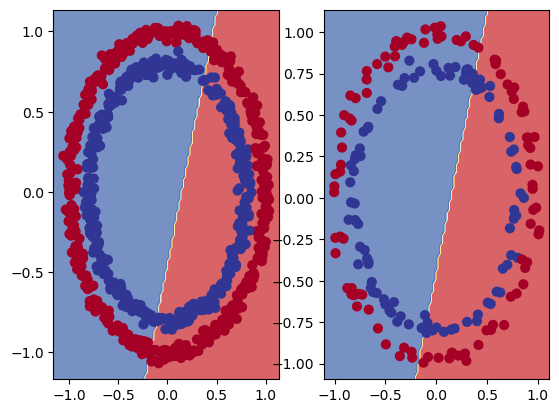

In [23]:
#plot decision boundary
import matplotlib.pyplot as plt
plt.subplot(1,2,1)
plot_decision_boundary(model=model, X=x_train, y=y_train)
plt.subplot(1,2,2)
plot_decision_boundary(model=model, X=x_test, y=y_test)